# d5bR52Cp2_Assignment_2_Networks_Science

<img src="entete.png">

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

In [2]:
#We ignore some warning message
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

# 1. Degree, Clustering Coefficient and Components

## (a) Design a small network of 6 nodes and compute by hand the clustering coefficient of each nodes. Compare your answers with NetworkX.

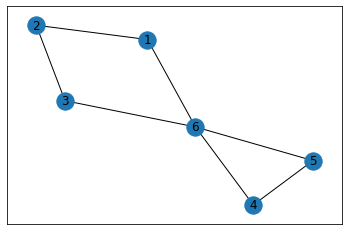

In [3]:
G=nx.Graph()
N=[1,2,3,4,5,6]
L=[(1,6),(1,2),(2,3),(3,6),(6,4),(6,5),(4,5)]
G.add_nodes_from(N)
G.add_edges_from(L)
nx.draw_networkx(G, with_labels=True)

<p> Let us compute the clustering coefficient of each node using the formula
$CC(i)=\frac{e_i}{d_i(d_i-1)/2}$ </p>

$CC(1)=0$ because $e_i=0$\
$CC(2)=0$ because $e_i=0$\
$CC(3)=0$ because $e_i=0$\
$CC(4)=\frac{1}{2(2-1)/2}=1$\
$CC(5)=\frac{1}{2(2-1)/2}=1$\
$CC(6)=\frac{1}{4(3)/2}=\frac{1}{6}=0.1666$

Let us compare our solution to the one given by the Networkx function

In [4]:
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 4: 1.0, 5: 1.0, 6: 0.16666666666666666}

We can see that clustering Networkx function give us the same the same solution than the oune we compute manually

## (b) Consider an undirected network of size N in which each node has degree k = 1. Which condition does N have to satisfy? What is the degree distribution of this network? How many components does the network have?

To have an undirected network of size N in which each node has degree $k=1$ 

N have to be an even number greatter than one: $N>1$ and $N=2n$ $\hspace{2cm}$$\forall n \in \mathbb{N^*}$

This network will have a uniform distribution due to the fact that all the node have the same degree.
$p(k)=p(1)=\frac{N_k}{N}=1$

This Networks will have $\frac{N}{2}$ components, each component will be form of two nodes.

## (c) Consider now a network in which each node has degree k = 2 and clustering coefficient C = 1. How does the network look like? What condition does N satisfy in this case?

If $k=2$ and $C=1$ the network will be a set of isolated triangle. Because $C=1$ means that we have a complete graph (each node is connected to all the others nodes od the networks) and $k=2$ means that each node is connected just to 2 others nodes. So we have a set of component where each coponet is form by a clique of 3 nodes. 

$N=3n$$\hspace{2cm}$$\forall n \in \mathbb{N^*}$

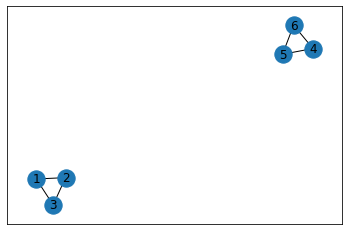

In [67]:
#We plot an exemple for N=6
G1=nx.Graph()
l1=[1,2,3,4,5,6]
l2=[(1,2),(1,3),(3,2),(4,5),(4,6),(5,6)]
G1.add_nodes_from(l1)
G1.add_edges_from(l2)
nx.draw_networkx(G1)

# 2. Consider the network below: Write your own python program to compute:

In [58]:
N=['A','B','C','D','E','F','G','H']
L=[('C','A'), ('D','A'), ('A','B'),('B','E'),('B','G'),('E','F'),('G','H')]
pos={'A':(-0.5,0),'B':(0.5,0),'C':(-1,1),'D':(-1,-1),'E':(0,1),'F':(1,1),'G':(0,-1),'H':(1,-1)}
G=nx.Graph()
G.add_nodes_from(N)
G.add_edges_from(L)

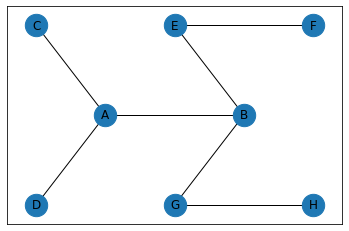

In [63]:
nx.draw_networkx(G, pos=pos,with_labels=True, node_size=500)

## (a) Degree centrality

In [9]:
def degree_c2(G,n=""):
    """
    G an undirected graph
    n the label of a specidique node (optional)
    return the degree centrality of all the node in a graph G
    if the 'n' is specify the function return the degree centrality of node 'n'
    """
    dc={}
    for i in G.nodes:
        d=0
        for j in G.nodes:
            if (i,j) in G.edges:
                d=d+1
        dc[i]=d/(len(G.nodes)-1)
    if n=="":
        return dc
    else:
        return dc[n]

In [10]:
degree_c2(G)

{'A': 0.42857142857142855,
 'B': 0.42857142857142855,
 'C': 0.14285714285714285,
 'D': 0.14285714285714285,
 'E': 0.2857142857142857,
 'F': 0.14285714285714285,
 'G': 0.2857142857142857,
 'H': 0.14285714285714285}

In [11]:
#We compute the degree centrality of node A
degree_c2(G,'A')

0.42857142857142855

In [12]:
#We compute the degree centrality of node B
degree_c2(G,'B')

0.42857142857142855

In [13]:
#We compute the degree centrality using the build in function on Netwotkx
nx.degree_centrality(G)

{'A': 0.42857142857142855,
 'B': 0.42857142857142855,
 'C': 0.14285714285714285,
 'D': 0.14285714285714285,
 'E': 0.2857142857142857,
 'F': 0.14285714285714285,
 'G': 0.2857142857142857,
 'H': 0.14285714285714285}

## (b) Closeness centrality

In [14]:
def dist(G,n1,n2):
    path=[n1]
    d=0
    while n2 not in path:
        for i in path:
            for j in G.nodes:
                if (i,j) in G.edges:
                    path.append(j)
            d=d+1
            if n2 in path:
                    return d
    return d

In [15]:
dist(G,'D','G')

3

In [16]:
dist(G,'G','D')

4

In [17]:
def closnes_cent(G,p=""):
    """
    G an undirected graph
    P the label of a specific node (optional)
    return the closeness centrality of all the node in a graph G
    if the 'p' is pecify the function return the degree centrality of node 'p'
    """
    clos={} #We create a dictionnary that will contain the closeness centrality of each node
    path=dict(nx.all_pairs_shortest_path_length(G)) #we compute the dictionary conatining the path lengh between all the node
    n=len(G.nodes)#We compute the number of node
    #We compute the closeness coefficient using the the formula (n-1)/sum(d(i,j))
    for i in G.nodes:
        sum_d=0 #we declare a variable that will contain the sum of all the distance
        for j in G.nodes:
            if i!=j:
                sum_d=sum_d+path[i][j]  #We compute sum(d(i,j))
        cc=(n-1)/sum_d #we compute the closeness coefficient of node i
        clos[i]=cc #We add it tho the dictionary that we have create above
    if p=="": #we test if the user have specify the node
        #If he didn't we return all the closeness centrality
        return clos
    else:
        #If he did we return all the closeness centrality of the node he has specify
        return clos[p]

In [18]:
closnes_cent(G)

{'A': 0.5384615384615384,
 'B': 0.6363636363636364,
 'C': 0.3684210526315789,
 'D': 0.3684210526315789,
 'E': 0.4666666666666667,
 'F': 0.3333333333333333,
 'G': 0.4666666666666667,
 'H': 0.3333333333333333}

In [19]:
#We compute the closeness centrality of node A 
closnes_cent(G,'A')

0.5384615384615384

In [20]:
#We compute the closeness centrality of node B 
closnes_cent(G,'B')

0.6363636363636364

In [21]:
#We compute the closeness centrality using the build in function
nx.closeness_centrality(G)

{'A': 0.5384615384615384,
 'B': 0.6363636363636364,
 'C': 0.3684210526315789,
 'D': 0.3684210526315789,
 'E': 0.4666666666666667,
 'F': 0.3333333333333333,
 'G': 0.4666666666666667,
 'H': 0.3333333333333333}

## (c) Eigenvector centrality

In [22]:
def eigenv_cent(G,n=""):
    A=nx.adjacency_matrix(G).todense() #We compute the adjency matrix of the graph
    w,v=np.linalg.eig(A) #We compute the eigen value w and the eigen vector v of A
    eigenv_cent={} #We create a dictionary that will contain our eigen vector centrality
    abs_w=abs(w) #we compute the absolute value of the eigen values
    #We now find the maximum eigen value and his index using the sequencial research technique
    max_w=abs_w[0] 
    ind_w=0
    for i in range(len(abs_w)):
        if abs_w[i]>max_w:
            max_w=abs_w[i]
            ind_w=i
    eign=abs(v[:,ind_w]) #We compute absolute value of the eigen vector assocate to the maximun eigen value
    j=0
    for i in G.nodes:
        eigenv_cent[i]=eign[:,0][j][0,0] #We in the the eigen vectors centrality of each node in the dictionary
        j=j+1
    if n=="": #we test if the user have specify the node
        #If he didn't we return all the eigen vectors centrality 
        return eigenv_cent
    else:
        #If he did we return all the eigen vectors centrality  of the node he has specify
        return eigenv_cent[n]

In [23]:
eigenv_cent(G)

{'A': 0.5,
 'B': 0.5745383453297613,
 'C': 0.23798157473898413,
 'D': 0.23798157473898413,
 'E': 0.35355339059327373,
 'F': 0.1682783852953887,
 'G': 0.35355339059327373,
 'H': 0.1682783852953887}

In [24]:
#We compute the eigen vector cetrality of node A
eigenv_cent(G,'A')

0.5

In [25]:
#We compute the eigen vector cetrality of node B
eigenv_cent(G,'B')

0.5745383453297613

In [26]:
#We compute the eigen vector centrality using the network build in function
nx.eigenvector_centrality(G)

{'A': 0.49999622394725,
 'B': 0.5745395873613748,
 'C': 0.23797857616309853,
 'D': 0.23797857616309853,
 'E': 0.3535560606456024,
 'F': 0.1682805055991448,
 'G': 0.3535560606456024,
 'H': 0.1682805055991448}

## (d) Betweenness centrality

In [27]:
nx.betweenness_centrality(G)

{'A': 0.5238095238095237,
 'B': 0.7619047619047619,
 'C': 0.0,
 'D': 0.0,
 'E': 0.2857142857142857,
 'F': 0.0,
 'G': 0.2857142857142857,
 'H': 0.0}

# 3. Zachary karate club

## (a)

In [30]:
#We load the Zakari karate club network
zkc=nx.karate_club_graph()

In [31]:
#We print the list of nodes
zkc.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [32]:
#We compute the number of node of our network
len(zkc.nodes)

34

In [33]:
#We compute and print the adjency matrice of the karate club networkx
A=nx.adjacency_matrix(zkc).todense()
A

matrix([[0, 4, 5, ..., 2, 0, 0],
        [4, 0, 6, ..., 0, 0, 0],
        [5, 6, 0, ..., 0, 2, 0],
        ...,
        [2, 0, 0, ..., 0, 4, 4],
        [0, 0, 2, ..., 4, 0, 5],
        [0, 0, 0, ..., 4, 5, 0]], dtype=int32)

In [34]:
#We add all the element on the diagonal to check if there is a loop inide our graph
sum(np.diag(A))

0

the result is 0 this mean that there is no loop inside the graph.

In [35]:
#we create a data frame in which we will put all the centrality measurement of our network
data=pd.DataFrame() 
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Node']=zkc.nodes
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Degree']=dict(zkc.degree).values()
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Degree_cent']=nx.degree_centrality(zkc).values()
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Close_cent']=nx.closeness_centrality(zkc).values()
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Betwen_cent']=nx.betweenness_centrality(zkc).values()
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['EigenVal_cent']=nx.eigenvector_centrality(zkc).values()
#We create a colunm Node in our data frame and we insert in it the degree of each node
data['Clust_cent']=nx.clustering(zkc).values()
data['subgraph_cent']=nx.subgraph_centrality(zkc).values()
#We print our data frame
data

,Node,Degree,Degree_cent,Close_cent,Betwen_cent,EigenVal_cent,Clust_cent,subgraph_cent
0,0,16,0.484848,0.568966,0.437635,0.355483,0.150000,128.095014
1,1,9,0.272727,0.485294,0.053937,0.265954,0.333333,71.430997
2,2,10,0.303030,0.559322,0.143657,0.317189,0.244444,88.704595
3,3,6,0.181818,0.464789,0.011909,0.211174,0.666667,48.180638
4,4,3,0.090909,0.379310,0.000631,0.075966,0.666667,10.246740
5,5,4,0.121212,0.383721,0.029987,0.079481,0.500000,12.347606
6,6,4,0.121212,0.383721,0.029987,0.079481,0.500000,12.347606
7,7,4,0.121212,0.440000,0.000000,0.170955,1.000000,32.074296
8,8,5,0.151515,0.515625,0.055927,0.227405,0.500000,45.067542
9,9,2,0.060606,0.434211,0.000848,0.102675,0.000000,10.584888


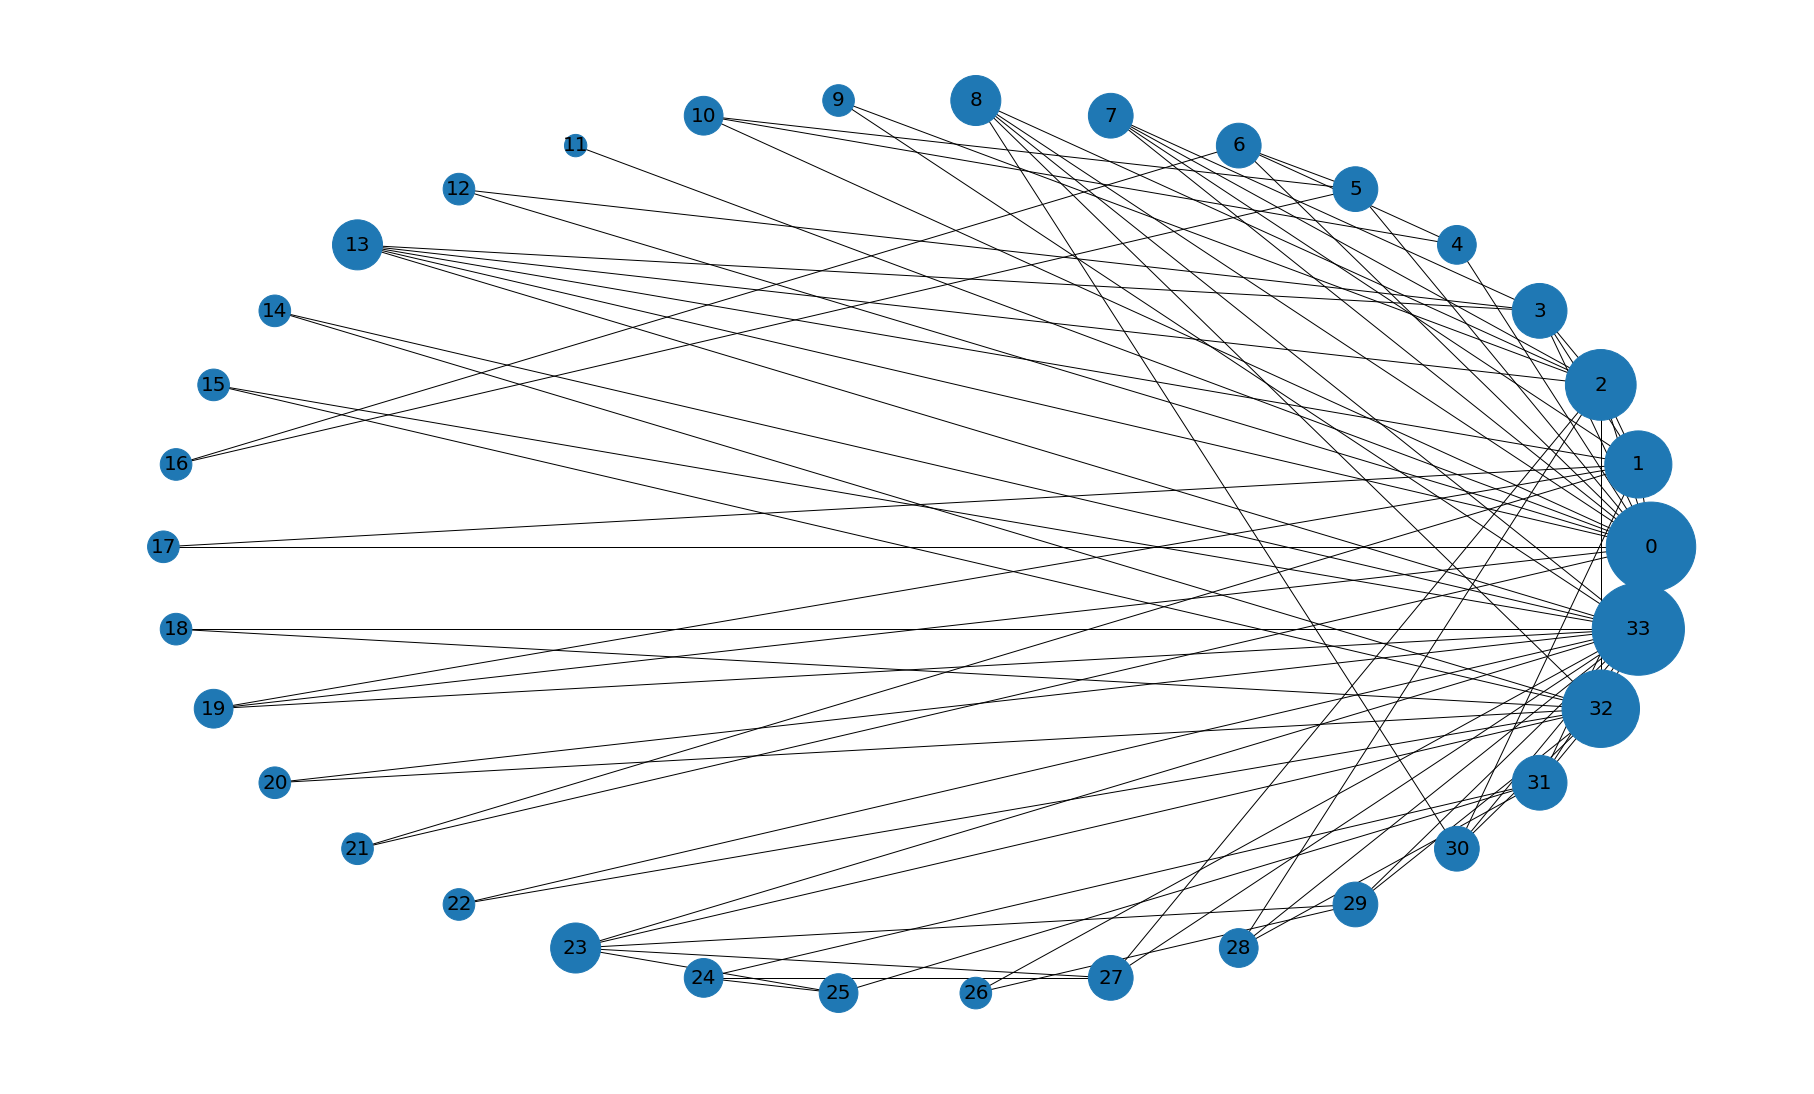

In [36]:
#We plot the network with the size of the node proportional to the hsi degree
plt.figure(figsize=(25,15))
nx.draw_circular(zkc,with_labels=True, node_size=data['Degree']*500, font_size=20)

## (b) Calculate the edge density of the Karate club network

In [37]:
def density_1(G):
    """
    return the density of a network
    G is a network graph
    """
    L=len(G.edges) #We compute the number of link in our network
    N=len(G.nodes) #We compute the number of node in the graph
    L_max=N*(N-1)/2 #We compute the maximum number of connection between nodes
    return L/L_max #We return the density of our graph given by the formula L/l_max

In [38]:
#We compute the density of the karate club network
density_1(zkc)

0.13903743315508021

The density value is 0.139. This means that the network is not very dense. That is in line with what we might expect for a social network. 

In [39]:
#We compute the density of the karate club network using the networkx build in function
nx.density(zkc)

0.13903743315508021

## (c) Plots graphs (centrality vs node)

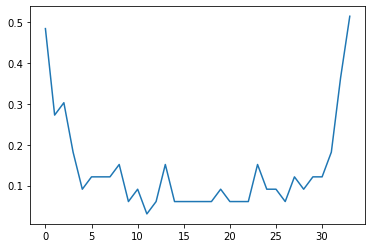

In [40]:
#We plot the node with the degree centrality
plt.plot(zkc.nodes, data['Degree_cent'])

We can see that much of the node have a low degree centrality coefficient. This mean taht the member of the karate club are not very connected one another.

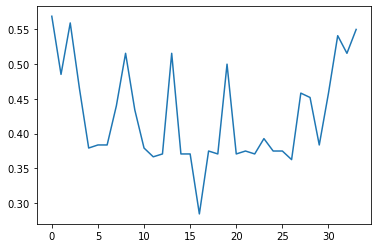

In [41]:
#We plot the node with the closeness centrality
plt.plot(zkc.nodes, data['Close_cent'])

We can see that the closeness coefficient is less that 0.55 for the large majority of the karate club member. this mean that there is a very low degree of interaction between them.

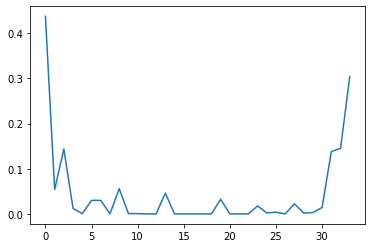

In [42]:
#We plot the node with the betweenness centrality
plt.plot(zkc.nodes, data['Betwen_cent'])

We can see that the betweenness centrality of the majority of the node is very low. The node '0' seem to play a very important role on passing information in the karate club, we can see that his betweenness centrality coefficient is far greater than the average.  

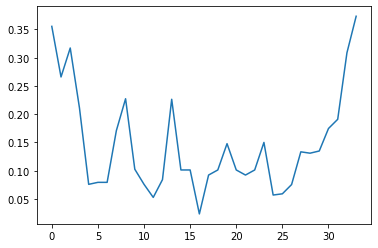

In [43]:
#We plot the node with the eigen vector centrality
plt.plot(zkc.nodes, data['EigenVal_cent'])

We can see from the graph above that the members '0' and '33'(The last point) seems to be the two must importants members of the karate club because they show an eigen vector centrality greater than everery body.

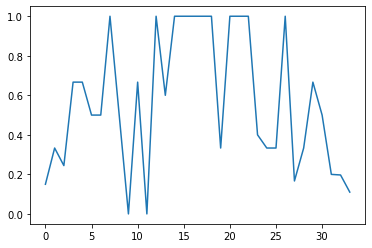

In [44]:
#We plot the node with the clustering centrality
plt.plot(zkc.nodes, data['Clust_cent'])

We can see that majority of members of the karate club show a very high clustering coefficient, this mean that theses members are probably organize in small group to work.

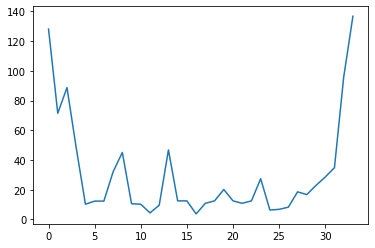

In [45]:
#We plot the node with the subgraph centrality
plt.plot(zkc.nodes, data['subgraph_cent'])

We can see from the graph that in average every member on the karate club are in the same number of subgraph. There is just some members who are in a very high number of graph. This can lead us to say that this kabate club have an hierarchical organization where member as split in group and the leader of the club are member of all the trainig group.

## (d) Calculate the average clustering coefficient

In [46]:
def average_cluster(G):
    #We create a list containing the clustering coefficient of each nodes
    l=[nx.clustering(G)[i] for i in G.nodes] 
    return np.average(l) #We return the average of the list we have created above

In [47]:
#Using the function we have define we compute the average clustering coefficient
average_cluster(zkc)

0.5706384782076823

This means that there is 57% of chance that two neighbours of a given node in the graph can know (conncected) each others.

In [48]:
#Using the networkx build in function we compute the average clustering coefficient
#and we compare it to the value our function give
nx.average_clustering(zkc)

0.5706384782076823

We obtain the same value.

## (e) Calculate the degree distribution P (k) and complementary cumulative degree distribution

In [49]:
#We create a function that compute the degree distribution
def degree_dist(G):
    deg=() #empty tuple that will contain the degree for which we have already compte the frequence
    degree_freq={} #A dictionnary that will contain the frequence of each degree
    degree_dist={} #A dictionnary that will contain the degree distribution of each degree
    #We sort the list of degree and we compute the frequency of each degree
    for i in np.sort(list(dict(G.degree).values())):
        if i not in deg:
            k=0
            for j in dict(G.degree).values():
                #We compute the number of node with degree "i"
                if i==j:
                    k=k+1
            degree_freq[i]=k  #We add the degree 'i' and his frequence 'k' in the dictionnary      
    #We compute the probability p(k)=N_k/N and we insert in the dictionnary
    for i in degree_freq.keys():
        degree_dist[i]=degree_freq[i]/len(G.nodes)
    return degree_dist

In [50]:
#Using the function we have define we compute the degree distribution
degree_dist(zkc)

{1: 0.029411764705882353,
 2: 0.3235294117647059,
 3: 0.17647058823529413,
 4: 0.17647058823529413,
 5: 0.08823529411764706,
 6: 0.058823529411764705,
 9: 0.029411764705882353,
 10: 0.029411764705882353,
 12: 0.029411764705882353,
 16: 0.029411764705882353,
 17: 0.029411764705882353}

In [51]:
#We test if the sum of p(k) is equal to one to verify our previous computation
np.sum([list(degree_dist(zkc).values())])

1.0

(array([12., 12.,  3.,  2.,  0.,  2.,  1.,  0.,  0.,  2.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

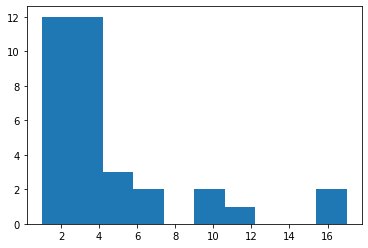

In [52]:
# We plot the historgram of the degree distribution
plt.hist(dict(zkc.degree).values(),cumulative=False)

We can see from the histogram above that the majority of the club member doesn't have many link (less than 4 link). There is just somme few node that have a great number of link. 

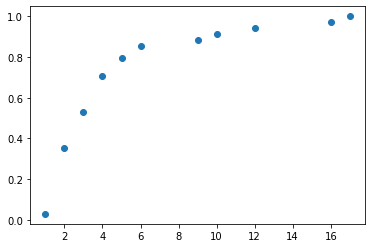

In [53]:
#We plot a scatter plot of the cummulative degree distribution
L_degree=list(degree_dist(zkc).keys()) #We create a list containig all the degree
L_freq=list(degree_dist(zkc).values())#We create a list containig all the degree frequence
cum=[L_freq[0]] #We create a list that will contain de cumulative degree frequence
for i in range(1,len(L_freq)):
    f=cum[i-1]+L_freq[i] #We we compute the cumulate frequence
    cum.append(f)
plt.scatter(L_degree,cum)#we plot the cummulate degree distribution using a scatter plot

(array([12., 24., 27., 29., 29., 31., 32., 32., 32., 34.]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

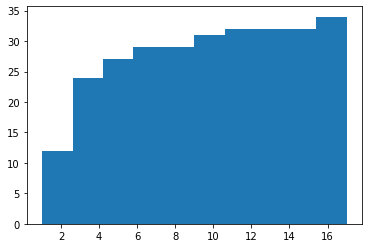

In [54]:
#we plot the cummulate degree distribution using a histogram
plt.hist(dict(zkc.degree).values(),cumulative=True)

# f) Calculate the average shortest path length L

In [55]:
nx.average_shortest_path_length(zkc)

2.408199643493761

This means that there is in average 2 (2.4) link to moove from one node to an anothers one.

## e) Using matplotlib.pyplot library, make a scatter plot of Ci

In [56]:
#We create a list containing all the clustering coefficient of the nodes of our grahp
c_i=[nx.clustering(zkc)[i] for i in zkc.nodes]
# We create a list containing all the the degree of the nodes of our graph
k_i=[zkc.degree[i] for i in zkc.nodes]

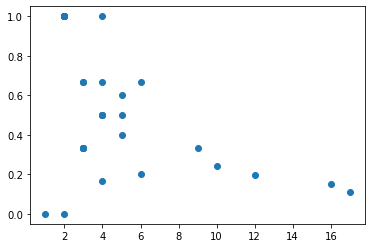

In [57]:
plt.xlabel="Degree"
plt.ylabel="Clustering"
#We plot a scatter plot with the degree on the x axis and clustering coefficient on the y axis 
plt.scatter(k_i,c_i)
plt.show()

<p>We can see that :<br>
    -The node with degree one have a clustering coefficent of zero.<br>
    -The node of degree two have a clustering coefficient equal to one or equal to zero. This mean that when your degree is two you are connected to two person. There is then just two possibility: either these two person are connected (the clustering will be one) or they are not connected (the clustering will be zero).<br>
    -For the degree greater than 2 we can see that more the degree encrease more the degree decrease. This can be explain by the fact that more you are connected to people less is the probability for them to be connected to one another.</p>